# Portfolio Project: Life Expectancy and GDP

For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, we will analyze, prepare, and plot data in order to answer questions (please refer to the main analysis part of this report) in a meaningful way.

## Project Setup

In [4]:
# Importing all required Python libraries:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Reading csv file as pandas dataframe:
all_data = pd.read_csv('all_data.csv')

# Exploring dataframe:
print(all_data.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


## Initial Data Exploration
We will start by creating 2 histograms across all countries, one for the life expectancy and another for the GDP to have a feel of the distribution of the raw data from the original dataset as it is.

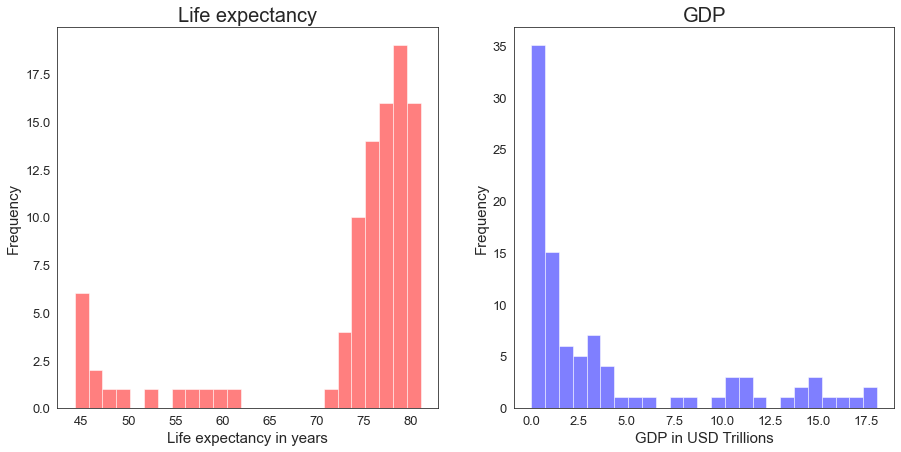

In [264]:
# Creating histogram with life expectancy data:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.hist(all_data['Life expectancy at birth (years)'], bins=25, color='red', alpha=0.5)
plt.xlabel('Life expectancy in years', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Life expectancy', fontsize=20)

# Creating histogram with GDP data:
ax2 = plt.subplot(1,2,2)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.hist(all_data['GDP']/1000000000000, bins=25, color='blue', alpha=0.5)
plt.xlabel('GDP in USD Trillions', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('GDP', fontsize=20)

plt.show()

*Regarding life expectancy, we can see that most of the data is clustered in the far right of the chart (between 70 to 80 years old). Most likely this part of the data belongs to the most developed countries from the list. However, we can also see a small cluster between 45-46 years, which probably belongs to the least developed countries from the list (which should not be more than 2 countries from the list).*

*In the GDP chart, we can see that most of the data is gathered to the left side of the chart. Most of the countries that we are going to analyze had GDP/year between 0 and 5 USD Trillions during the 2000-2015 period, yet there are some countries also in the dataset that show larger GDPs/year, between 10 to 17.5 USD Trillions.*

## Main Analysis
Here we will cover the following questions proposed by Codecademy. We will rely on data visualization tools for finding the answers.
1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

### 1. Has life expectancy increased over time in the six nations?
We will use a line plot for this (Year vs Life Expectancy) with Matplotlib showing one line per country to see the evolution of this metric across time.

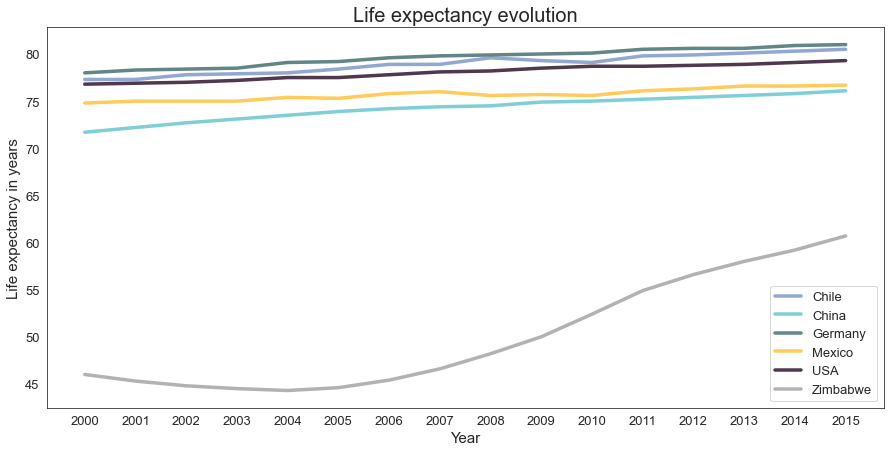

In [225]:
# Creating the needed datasets:
chile_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'Chile']
china_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'China']
germany_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'Germany']
mexico_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'Mexico']
usa_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'United States of America']
zimbabwe_LE = all_data['Life expectancy at birth (years)'][all_data.Country == 'Zimbabwe']
years = all_data.Year.unique()

# Creating the line plot:
plt.figure(figsize=(15,7))
ax = plt.subplot()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.plot(range(len(years)),chile_LE, color='#92a8d1', linewidth=3.5)
plt.plot(range(len(years)),china_LE, color='#80ced6', linewidth=3.5)
plt.plot(range(len(years)),germany_LE, color='#618685', linewidth=3.5)
plt.plot(range(len(years)),mexico_LE, color='#ffcc5c', linewidth=3.5)
plt.plot(range(len(years)),usa_LE, color='#50394c', linewidth=3.5)
plt.plot(range(len(years)),zimbabwe_LE, color='#b2b2b2', linewidth=3.5)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'], fontsize=13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Life expectancy in years', fontsize=15)
plt.title('Life expectancy evolution', fontsize=20)
plt.show()

*From the graph, it can be seen that indeed the life expectancy increased for all six countries from 2000 till 2015.*

*Zimbabwe showed the biggest growth, yet its life expectancy decreased from 2000 till 2004, to start growing from there at a higher rate than the other countries. It has to be said, however, that Zimbabwe overall still has the lowest life expectancy in 2015 (around 60 years), with the rest of the countries showing similar numbers and growth behaviour amongst them.*

*Germany achieved a life expectancy of 81 years in 2015, which is quite impressive.*

### 2. Has GDP increased over time in the six nations?
Similar to the previous question, we will again use a line plot for this (Year vs GDP) with Matplotlib showing one line per country to see the evolution of this metric across time.

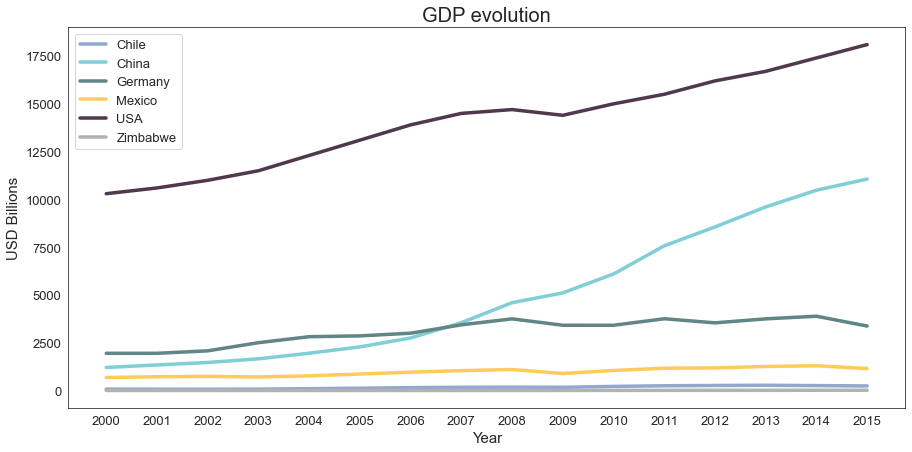

In [226]:
# Creating the needed datasets:
chile_GDP = all_data['GDP'][all_data.Country == 'Chile']/1000000000
china_GDP = all_data['GDP'][all_data.Country == 'China']/1000000000
germany_GDP = all_data['GDP'][all_data.Country == 'Germany']/1000000000
mexico_GDP = all_data['GDP'][all_data.Country == 'Mexico']/1000000000
usa_GDP = all_data['GDP'][all_data.Country == 'United States of America']/1000000000
zimbabwe_GDP = all_data['GDP'][all_data.Country == 'Zimbabwe']/1000000000
years = all_data.Year.unique()

# Creating the line plot:
plt.figure(figsize=(15,7))
ax = plt.subplot()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.plot(range(len(years)),chile_GDP, color='#92a8d1', linewidth=3.5)
plt.plot(range(len(years)),china_GDP, color='#80ced6', linewidth=3.5)
plt.plot(range(len(years)),germany_GDP, color='#618685', linewidth=3.5)
plt.plot(range(len(years)),mexico_GDP, color='#ffcc5c', linewidth=3.5)
plt.plot(range(len(years)),usa_GDP, color='#50394c', linewidth=3.5)
plt.plot(range(len(years)),zimbabwe_GDP, color='#b2b2b2', linewidth=3.5)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'], fontsize=13)
plt.xlabel('Year', fontsize=15)
plt.ylabel('USD Billions', fontsize=15)
plt.title('GDP evolution', fontsize=20)
plt.show()

*From the graph, it can be seen that indeed the GDP increased for USA, Germany and China from 2000 till 2015 (with USA showing a massive economy growth of 75% to achieve a GDP above 17,500 USD Billions in 2015. China's growth was even larger in proportion (above 700%) achieving beyond 1 Trillion USD of GDP in 2015. Germany's growth was smaller, reaching a peak in its GDP in 2008 and 2011 yet always around 3,000 USD Billions.*

*However, for the other 3 countries this graph is not very helpful. Therefore, we will do another one only for this 3 countries to bypass the scale issue generated by the presence of the first 3 'giants'.*

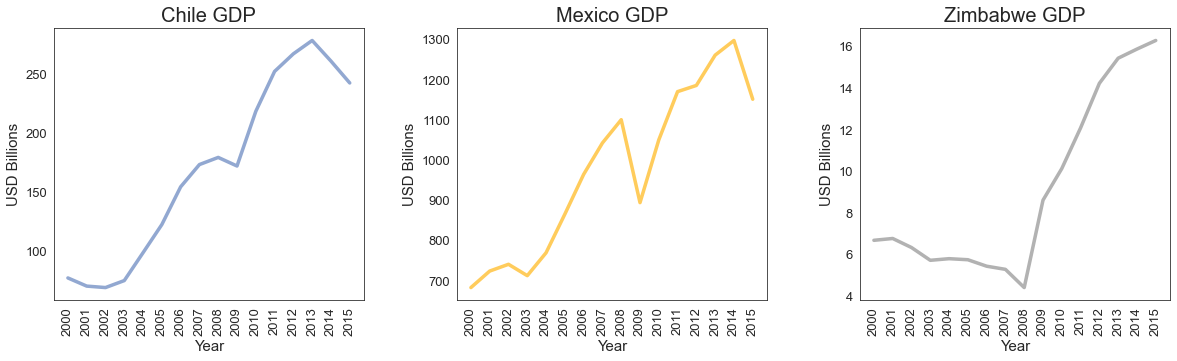

In [227]:
# Creating side by side line plots for Chile, Mexico and Zimbabwe:
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.plot(range(len(years)),chile_GDP, color='#92a8d1', linewidth=3.5)
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=90)
plt.xlabel('Year', fontsize=15)
plt.ylabel('USD Billions', fontsize=15)
plt.title('Chile GDP', fontsize=20)

ax2 = plt.subplot(1,3,2)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.plot(range(len(years)),mexico_GDP, color='#ffcc5c', linewidth=3.5)
ax2.set_xticks(range(len(years)))
ax2.set_xticklabels(years, rotation=90)
plt.xlabel('Year', fontsize=15)
plt.ylabel('USD Billions', fontsize=15)
plt.title('Mexico GDP', fontsize=20)

ax3 = plt.subplot(1,3,3)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.plot(range(len(years)),zimbabwe_GDP, color='#b2b2b2', linewidth=3.5)
ax3.set_xticks(range(len(years)))
ax3.set_xticklabels(years, rotation=90)
plt.xlabel('Year', fontsize=15)
plt.ylabel('USD Billions', fontsize=15)
plt.title('Zimbabwe GDP', fontsize=20)

plt.subplots_adjust(wspace=.3)

plt.show()

*Now, it is clear that the GDP grew from 2000 till 2015 for Chile, Mexico and Zimbabwe as well. This growth was quite volatile, specially for Mexico and Zimbabwe, which showed GDP minumums in 2009 and 2008 respectively (most likely as a consequence of the 2007-2008 Worldwide Financial Crisis).*

### 2. Is there a correlation between GDP and life expectancy of a country?
To answer this question, we will use 6 scatter plots (one per country) to check for possible trends.

In [228]:
# Creating a function for ploting 6 GDP vs life expectancy for all 6 countries:
def LE_vs_GDP(df):
    plt.figure(figsize=(20,15))
    countries = all_data.Country.unique()
    colors = ['#92a8d1', '#80ced6', '#618685', '#ffcc5c', '#50394c', '#b2b2b2']
    for i in range(len(countries)):
        ax = plt.subplot(2,3, i+1)
        plt.rc('xtick', labelsize=13) 
        plt.rc('ytick', labelsize=13)
        plt.scatter(all_data['GDP'][all_data.Country == countries[i]]/1000000000, all_data['Life expectancy at birth (years)'][all_data.Country == countries[i]], color=colors[i], s=100)
        plt.xlabel('GDP in USD Billions', fontsize=15)
        plt.ylabel('Life expectancy in years', fontsize=15)
        plt.title(countries[i], fontsize=20)
    plt.subplots_adjust(wspace=.3)
    plt.subplots_adjust(hspace=.3)
    plt.show()

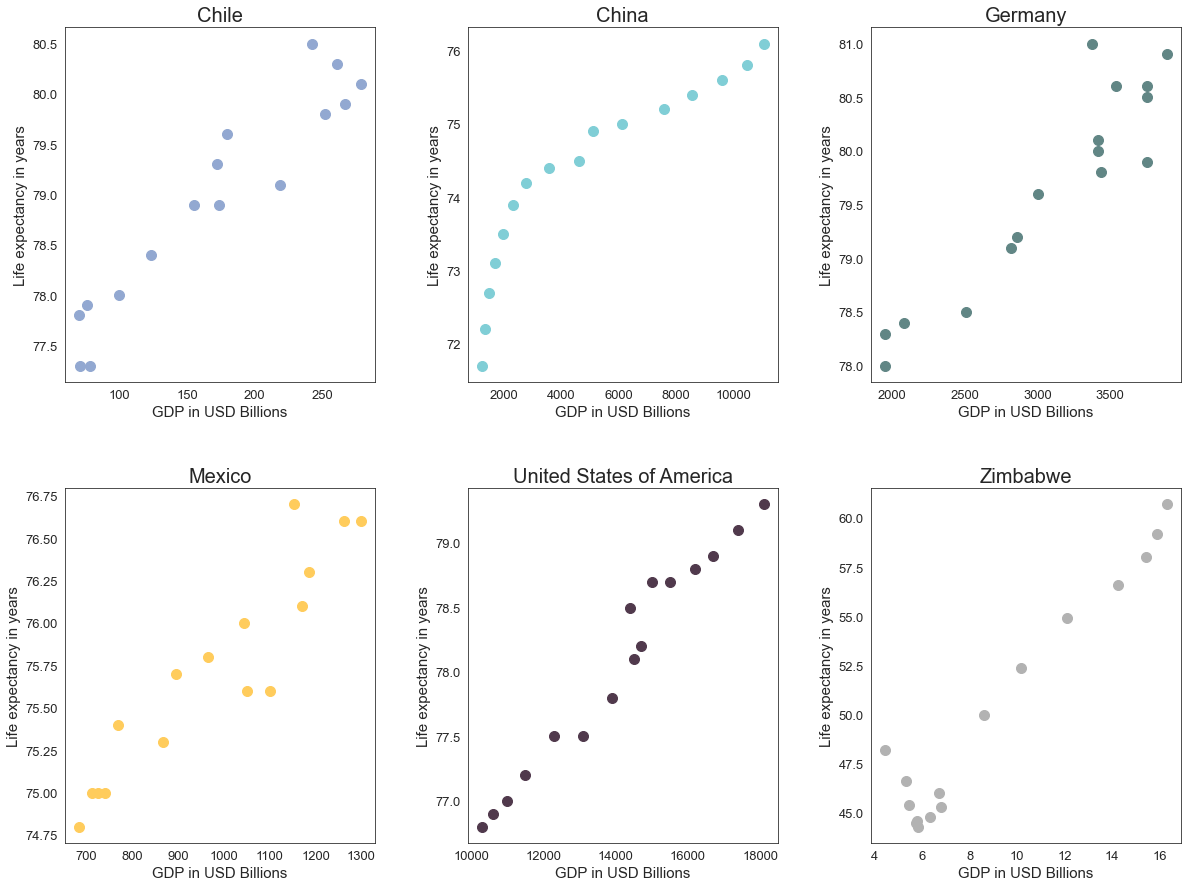

In [229]:
# Using the created function:
LE_vs_GDP(all_data)

*From the graphs, it can be inferred that there is definitely correlation between GPD and life expectancy in all countries from the sample. Chile, Germany, Mexico and USA show almost a linear correlation between the 2 variables, which makes total sense. In the case of China, there seems to be a non-linear correlation, as life expectancy increased significantly when the GDP changed from USD 2,000 Billions to 3,000; then the life expectancy kept growing at a smaller rate compared to GDP. Zimbabwe also shows a linear correlation between the 2 variables once the GDP grew beyond USD 7 Billions, yet before this amount there was no clear relationship between the 2 variables.*

### 4. What is the average life expectancy in these nations?
We will use a bar plot for this with Seaborn to compare the average life expectancy across countries.

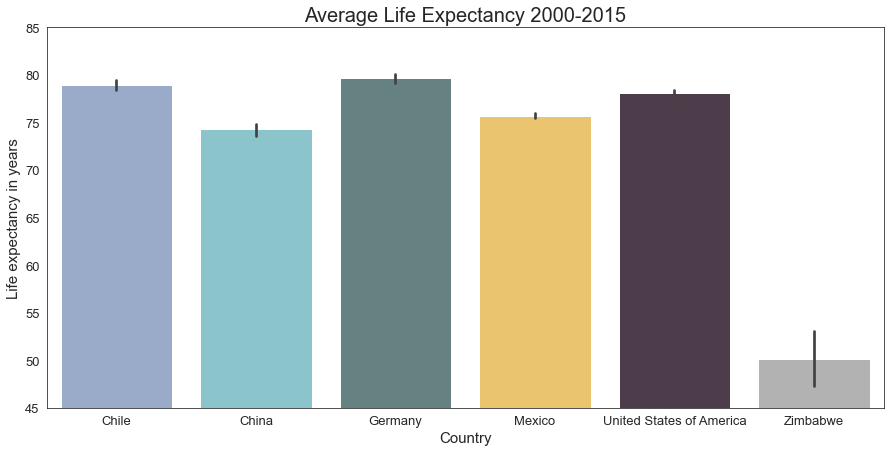

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


In [244]:
# Creating the bar plot with Seaborn:
sns.set_style('white')
plt.figure(figsize=(15,7))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
colors = ['#92a8d1', '#80ced6', '#618685', '#ffcc5c', '#50394c', '#b2b2b2']
ax = sns.barplot(data=all_data, x='Country', y='Life expectancy at birth (years)', palette=colors)
ax.set(ylim=(45,85))
ax.set_title('Average Life Expectancy 2000-2015', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Life expectancy in years', fontsize=15)
plt.show()

# Calculating the mean average life expectancy per country:
mean_LE = all_data.groupby('Country')['Life expectancy at birth (years)'].mean()
print(mean_LE)

*As visually confirmed by the graphs, the life expectancy in Germany is the highest (\~80 years) and the life expectancy in Zimbabwe is the lowest on average (\~50 years).*

### 5. What is the distribution of that life expectancy?
We will use a violin plot for this with Seaborn to have a glance at the distribution of the life expectancy in each country.

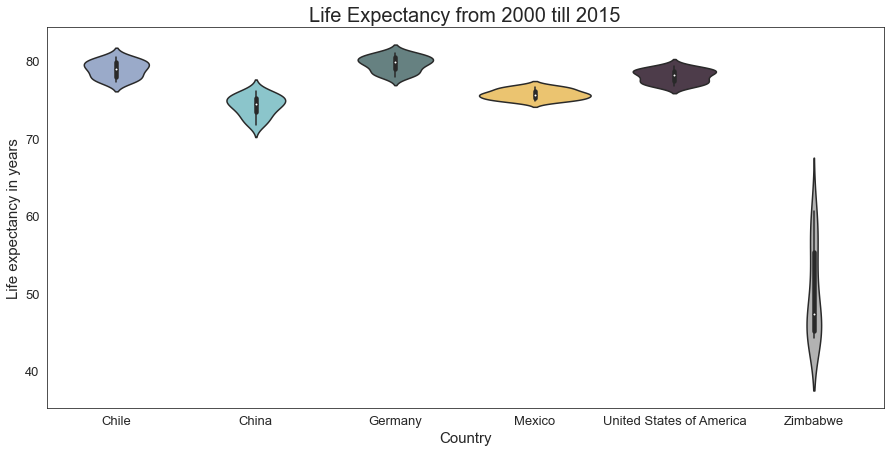

In [247]:
# Creating the violin plot with Seaborn:
sns.set_style('white')
plt.figure(figsize=(15,7))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
colors = ['#92a8d1', '#80ced6', '#618685', '#ffcc5c', '#50394c', '#b2b2b2']
ax = sns.violinplot(data=all_data, x='Country', y='Life expectancy at birth (years)', palette=colors)
ax.set_title('Life Expectancy from 2000 till 2015', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Life expectancy in years', fontsize=15)
plt.show()

*With this distribution, we can see how much the life expectancy has changed in each country during the 2000-2015 period. Zimbabwe has changed the most, achieving a maximum of \~60 years, still far from other countries like Chile and Germany (IQR between 77 and 80 years). Mexico shows the smallest change in life expectancy during these years, with a median ~75 years.*

### *Conclusions*
* *In all 6 countries, both the life expectancy and the GDP have grown in the analyzed period (2000-2015). From the visual information, we were able to identify a strong correlation between these 2 variables. This correlation is linear for 4 out of the 6 countries*
* *Some countries, like China, made the most of their GDP growth to increase its life expectancy; while other countries like Zimbabwe also grew in both variables, yet it is still far both in GDP and life expectancy to the leading countries (USA and Germany)*
* *Regardless of its smaller GDP compared to the leading countries, Chile has the second best life expectancy of the group, only behind Germany - this proves that although there seems to be a linear correlation between GDP and life expectation, the slope of this curve (correlation) would be different depending on each country*
* *In Zimbabwe, the life expectancy changed the most during the analyzed period (IQR between 45 and 55 years). In Mexico, the life expectancy changed the least (IQR between 74 and 76)*